---
title: "EA"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
import openmatrix as omx
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# User Inptus

In [3]:
# scenario paths
scenarioOnePath = r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2'          # EMME OpenPaths
scenarioTwoPath = r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2'     # EMME 4.3.7

# desired matrix
matrix = 'transit_skims_EA.omx'

# desired sub matrices
sub_matrices = [
    'WALK_PRM_TOTALIVTT__EA'
    ,'WALK_PRM_LRTIVTT__EA'
    ,'WALK_PRM_CMRIVTT__EA'
    ,'WALK_PRM_EXPIVTT__EA'
    ,'WALK_PRM_LTDEXPIVTT__EA'
    ,'WALK_PRM_BRTIVTT__EA'
    ]

In [4]:
# create paths to read
skimFileOne = os.path.join(scenarioOnePath, 'output', 'skims', matrix) # EMME OpenPaths
skimFileTwo = os.path.join(scenarioTwoPath, 'output', 'skims', matrix) # EMME 4.3.7
print('EMME OpenPath: ' + skimFileOne)
print('EMME 4.3.7: ' + skimFileTwo)

EMME OpenPath: T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2\output\skims\transit_skims_EA.omx
EMME 4.3.7: T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2\output\skims\transit_skims_EA.omx


In [5]:
# compare function
def skimReader(inSkim):

    # read skim
    skims = omx.open_file(inSkim)
    zones = list(skims.mapping('zone_number').keys())

    # empty df with all zone-to-zone combinations
    zoneToZone = pd.DataFrame(list(itertools.product(list(range(1,4947+1,1)), repeat=2)))
    zoneToZone.columns = ['Origin', 'Destination']

    # read sub-matrices, convert from wide to long, and merge
    for sub_matrix in sub_matrices:
        od = pd.DataFrame(
            np.array(skims[sub_matrix]),
            zones,
            zones,
            )
        od = od.stack().reset_index().set_axis('Origin Destination {}'.format(sub_matrix).split(), axis=1)
        zoneToZone = zoneToZone.merge(od, on=['Origin', 'Destination'])
    
    return(zoneToZone)

In [6]:
# generate comparison
scenarioOne = skimReader(skimFileOne)
scenarioTwo = skimReader(skimFileTwo)

# OpenPaths minus EMME4.3.7 (exclude Origin and Destination columns)
comparison = scenarioOne.set_index(['Origin', 'Destination']) - scenarioTwo.set_index(['Origin','Destination'])
comparison.reset_index(inplace=True)

# Scatterplot Comparison of EA Peak for WALK PRM modes assignment

Scatterplot comparison of EA Peak total actual in-vehicle travel time by walk premium

Intercept: -0.0024
Slope: 1.0000
R² Score: 0.9998
RMSE: 0.3772


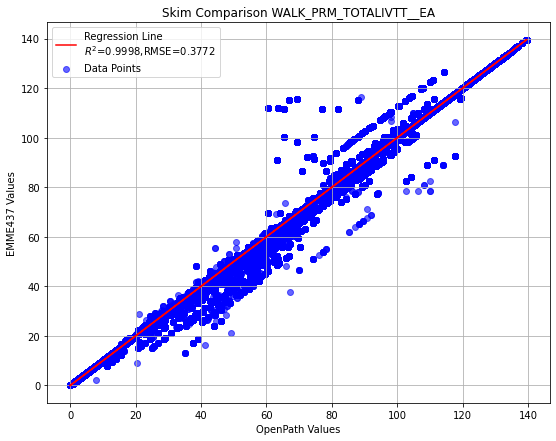

In [7]:
OpenPath_values = scenarioOne['WALK_PRM_TOTALIVTT__EA'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_TOTALIVTT__EA']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_TOTALIVTT__EA")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of EA Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0006
Slope: 1.0001
R² Score: 0.9996
RMSE: 0.2602


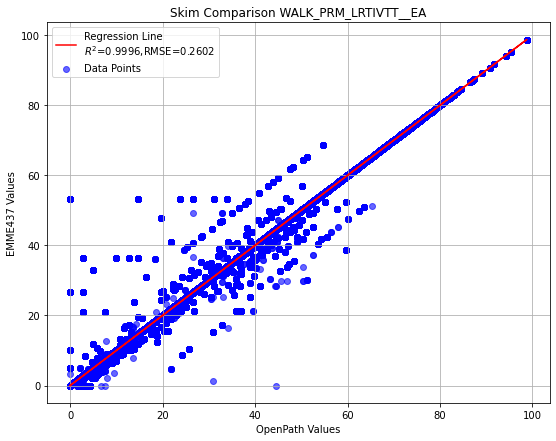

In [8]:
OpenPath_values = scenarioOne['WALK_PRM_LRTIVTT__EA'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_LRTIVTT__EA']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_LRTIVTT__EA")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of EA Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: 0.0017
Slope: 0.9935
R² Score: 0.9981
RMSE: 0.3549


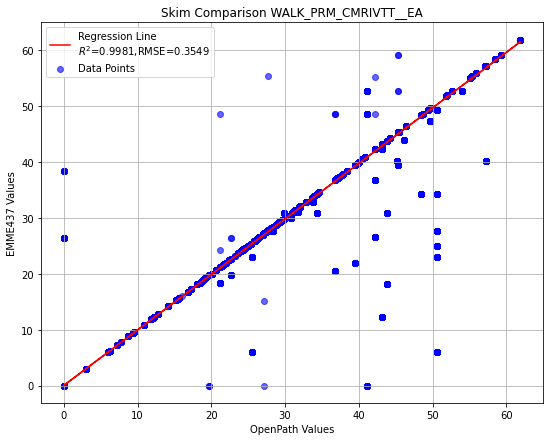

In [9]:
OpenPath_values = scenarioOne['WALK_PRM_CMRIVTT__EA'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_CMRIVTT__EA']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_CMRIVTT__EA")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of EA Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0012
Slope: 0.9934
R² Score: 0.9976
RMSE: 0.2736


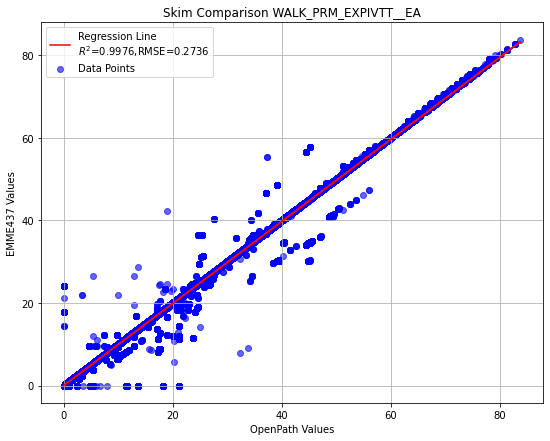

In [10]:
OpenPath_values = scenarioOne['WALK_PRM_EXPIVTT__EA'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_EXPIVTT__EA']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_EXPIVTT__EA")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of EA Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0105
Slope: 1.0000
R² Score: 0.9985
RMSE: 0.4762


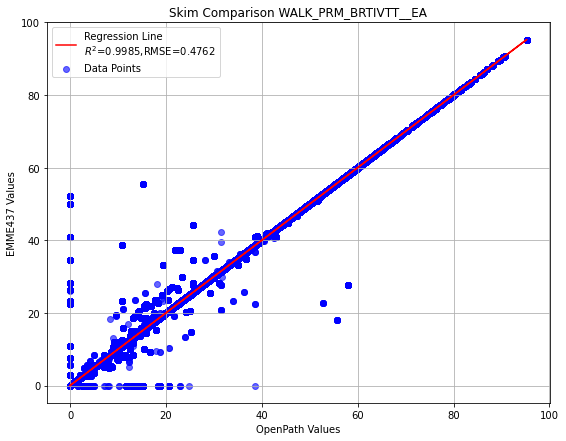

In [11]:
OpenPath_values = scenarioOne['WALK_PRM_BRTIVTT__EA'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_BRTIVTT__EA']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_BRTIVTT__EA")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Summary of transit EA skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__EA)

In [12]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__EA', ascending=False).head()

,Origin,Destination,WALK_PRM_TOTALIVTT__EA,WALK_PRM_LRTIVTT__EA,WALK_PRM_CMRIVTT__EA,WALK_PRM_EXPIVTT__EA,WALK_PRM_LTDEXPIVTT__EA,WALK_PRM_BRTIVTT__EA
18526584,3746,70,31.489388,20.478338,-11.819832,0.000000,0.0,22.830877
18689835,3779,70,31.489388,20.478338,-11.819832,0.000000,0.0,22.830877
18875036,3816,2232,29.592892,15.369926,0.000000,6.025824,0.0,8.197143
18874589,3816,1785,27.923042,15.369926,0.000000,7.842306,0.0,4.710809
18610692,3763,79,27.764214,15.785898,-6.405384,0.000000,0.0,18.383698


Below is the summary of select matrices difference in transit EA skim

In [13]:
comparison.WALK_PRM_TOTALIVTT__EA.describe()

count    2.447281e+07
mean     2.112615e-03
std      3.771767e-01
min     -5.130614e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.148939e+01
Name: WALK_PRM_TOTALIVTT__EA, dtype: float64

In [14]:
comparison.WALK_PRM_LRTIVTT__EA.describe()

count    2.447281e+07
mean    -1.183128e-03
std      2.602146e-01
min     -5.338018e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.448636e+01
Name: WALK_PRM_LRTIVTT__EA, dtype: float64

In [15]:
comparison.WALK_PRM_CMRIVTT__EA.describe()

count    2.447281e+07
mean     8.070460e-03
std      3.586871e-01
min     -3.836789e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.465775e+01
Name: WALK_PRM_CMRIVTT__EA, dtype: float64

In [16]:
comparison.WALK_PRM_EXPIVTT__EA.describe()

count    2.447281e+07
mean     5.874654e-03
std      2.760243e-01
min     -2.419064e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.460604e+01
Name: WALK_PRM_EXPIVTT__EA, dtype: float64

In [17]:
comparison.WALK_PRM_LTDEXPIVTT__EA.describe()

count    24472809.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0
Name: WALK_PRM_LTDEXPIVTT__EA, dtype: float64

In [18]:
comparison.WALK_PRM_BRTIVTT__EA.describe()

count    2.447281e+07
mean    -1.064935e-02
std      4.761807e-01
min     -5.229026e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.862811e+01
Name: WALK_PRM_BRTIVTT__EA, dtype: float64

Let's check the records with difference in WALK_PRM_LRTIVTT__EA greater than 40

In [22]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__EA']>40]

,Origin,Destination,WALK_PRM_TOTALIVTT__EA,WALK_PRM_LRTIVTT__EA,WALK_PRM_CMRIVTT__EA,WALK_PRM_EXPIVTT__EA,WALK_PRM_LTDEXPIVTT__EA,WALK_PRM_BRTIVTT__EA
16940581,3425,2054,18.38797,44.486362,0.0,0.0,0.0,-26.098392


Let's check the records with difference in WALK_PRM_LRTIVTT__EA less than -50

In [20]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__EA']<-50]

,Origin,Destination,WALK_PRM_TOTALIVTT__EA,WALK_PRM_LRTIVTT__EA,WALK_PRM_CMRIVTT__EA,WALK_PRM_EXPIVTT__EA,WALK_PRM_LTDEXPIVTT__EA,WALK_PRM_BRTIVTT__EA
14232757,2878,239,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232770,2878,252,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232771,2878,253,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232779,2878,261,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232781,2878,263,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232782,2878,264,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232787,2878,269,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232789,2878,271,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232792,2878,274,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058
14232795,2878,277,-46.226295,-53.38018,25.665941,0.0,0.0,-18.512058


In [21]:
# choose sub-matrix
sub_matrix_number = 0 # see below for specific sub_marix number
n_largest = 25

sub_matrix = [
    'WALK_PRM_TOTALIVTT__EA'     # 0
    ,'WALK_PRM_BRTIVTT__EA'      # 1
    ,'WALK_PRM_CMRIVTT__EA'      # 2
    ,'WALK_PRM_EXPIVTT__EA'      # 3
    ,'WALK_PRM_LRTIVTT__EA'      # 4
    ,'WALK_PRM_LTDEXPIVTT__EA'   # 5
]

# choose N largest
print('Choosing top ' + str(n_largest) + ' of ' + str(sub_matrix[sub_matrix_number]))
comparison.nsmallest(n_largest, sub_matrix[0])[['Origin', 'Destination', sub_matrix[sub_matrix_number]]].sort_values(by=sub_matrix[sub_matrix_number], ascending=False)

Choosing top 25 of WALK_PRM_TOTALIVTT__EA


,Origin,Destination,WALK_PRM_TOTALIVTT__EA
8043903,1627,82,-51.306137
8043931,1627,110,-51.306137
8043951,1627,130,-51.306137
8043948,1627,127,-51.306137
8043945,1627,124,-51.306137
8043942,1627,121,-51.306137
8043941,1627,120,-51.306137
8043940,1627,119,-51.306137
8043939,1627,118,-51.306137
8043938,1627,117,-51.306137
